In [1]:
import pandas as pd
import numpy as np

In [2]:
btc_df = pd.read_csv("augmento_btc.csv")

In [3]:
btc_df.head()

,date,listing_close,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,twitter_bottom,twitter_institutional_money,twitter_fomo,twitter_prediction,twitter_adoption,twitter_fearful_concerned,twitter_portfolio,twitter_fud_theme,twitter_whitepaper,twitter_announcements,twitter_technical_analysis,twitter_flippening,twitter_community,twitter_investing_trading,twitter_euphoric_excited,twitter_hodling,twitter_ico,twitter_bearish,twitter_going_short,twitter_uncertain,twitter_volume,twitter_risk,twitter_governance,twitter_ban,twitter_cheap,twitter_short_term_trading,twitter_fork,twitter_progress,twitter_shilling,...,reddit_sad,reddit_panicking,reddit_listing,reddit_regulation_politics,reddit_dip,reddit_launch,reddit_fomo_theme,reddit_advice_support,reddit_rebranding,reddit_wallet,reddit_good_news,reddit_problems_and_issues,reddit_mining,reddit_waiting,reddit_learning,reddit_scaling,reddit_fees,reddit_roadmap,reddit_recovery,reddit_technology,reddit_mistrustful,reddit_marketcap,reddit_positive,reddit_tax,reddit_long_term_investing,reddit_strategy,reddit_competition,reddit_whales,reddit_correction,reddit_stablecoin,reddit_buying,reddit_warning,reddit_annoyed_frustrated,reddit_price,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative
0,2016-11-01 23:00:00,726.60,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,6.0
1,2016-11-02 00:00:00,721.96,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,2.0,5.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,3.0,3.0
2,2016-11-02 01:00:00,722.49,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,11.0,0.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,6.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,3.0,12.0
3,2016-11-02 02:00:00,721.66,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0
4,2016-11-02 03:00:00,724.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,10.0,0.0,1.0,3.0,3.0,4.0,0.0,1.0,0.0,2.0,0.0,0.0,10.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,5.0,0.0,1.0,0.0,2.0,11.0


In [3]:
btc_df['listing_close'] = np.log10(btc_df['listing_close'])
btc_df.head()

,date,listing_close,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,twitter_bottom,twitter_institutional_money,twitter_fomo,twitter_prediction,twitter_adoption,twitter_fearful_concerned,twitter_portfolio,twitter_fud_theme,twitter_whitepaper,twitter_announcements,twitter_technical_analysis,twitter_flippening,twitter_community,twitter_investing_trading,twitter_euphoric_excited,twitter_hodling,twitter_ico,twitter_bearish,twitter_going_short,twitter_uncertain,twitter_volume,twitter_risk,twitter_governance,twitter_ban,twitter_cheap,twitter_short_term_trading,twitter_fork,twitter_progress,twitter_shilling,...,reddit_sad,reddit_panicking,reddit_listing,reddit_regulation_politics,reddit_dip,reddit_launch,reddit_fomo_theme,reddit_advice_support,reddit_rebranding,reddit_wallet,reddit_good_news,reddit_problems_and_issues,reddit_mining,reddit_waiting,reddit_learning,reddit_scaling,reddit_fees,reddit_roadmap,reddit_recovery,reddit_technology,reddit_mistrustful,reddit_marketcap,reddit_positive,reddit_tax,reddit_long_term_investing,reddit_strategy,reddit_competition,reddit_whales,reddit_correction,reddit_stablecoin,reddit_buying,reddit_warning,reddit_annoyed_frustrated,reddit_price,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative
0,2016-11-01 23:00:00,2.861295,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,6.0
1,2016-11-02 00:00:00,2.858513,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,2.0,5.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,3.0,3.0
2,2016-11-02 01:00:00,2.858832,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,11.0,0.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,6.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,3.0,12.0
3,2016-11-02 02:00:00,2.858333,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0
4,2016-11-02 03:00:00,2.860272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,10.0,0.0,1.0,3.0,3.0,4.0,0.0,1.0,0.0,2.0,0.0,0.0,10.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,5.0,0.0,1.0,0.0,2.0,11.0


In [5]:
btc_df.tail()

,date,listing_close,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,twitter_bottom,twitter_institutional_money,twitter_fomo,twitter_prediction,twitter_adoption,twitter_fearful_concerned,twitter_portfolio,twitter_fud_theme,twitter_whitepaper,twitter_announcements,twitter_technical_analysis,twitter_flippening,twitter_community,twitter_investing_trading,twitter_euphoric_excited,twitter_hodling,twitter_ico,twitter_bearish,twitter_going_short,twitter_uncertain,twitter_volume,twitter_risk,twitter_governance,twitter_ban,twitter_cheap,twitter_short_term_trading,twitter_fork,twitter_progress,twitter_shilling,...,reddit_sad,reddit_panicking,reddit_listing,reddit_regulation_politics,reddit_dip,reddit_launch,reddit_fomo_theme,reddit_advice_support,reddit_rebranding,reddit_wallet,reddit_good_news,reddit_problems_and_issues,reddit_mining,reddit_waiting,reddit_learning,reddit_scaling,reddit_fees,reddit_roadmap,reddit_recovery,reddit_technology,reddit_mistrustful,reddit_marketcap,reddit_positive,reddit_tax,reddit_long_term_investing,reddit_strategy,reddit_competition,reddit_whales,reddit_correction,reddit_stablecoin,reddit_buying,reddit_warning,reddit_annoyed_frustrated,reddit_price,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative
71864,2025-01-13 07:00:00,4.970714,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,15.0,0.0,5.0,8.0,4.0,1.0,1.0,4.0,0.0,3.0,0.0,0.0,11.0,0.0,1.0,7.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0,3.0,0.0,0.0,11.0,3.0,0.0,1.0,0.0,2.0,13.0
71865,2025-01-13 08:00:00,4.968394,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3.0,1.0,0.0,0.0,14.0,0.0,3.0,5.0,5.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,11.0,0.0,3.0,0.0,6.0,0.0,1.0,0.0,1.0,0.0,0.0,14.0,3.0,1.0,1.0,0.0,5.0,11.0
71866,2025-01-13 09:00:00,4.967553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,4.0,1.0,0.0,0.0,18.0,0.0,5.0,8.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,12.0,0.0,4.0,1.0,7.0,0.0,1.0,0.0,6.0,0.0,0.0,20.0,3.0,0.0,0.0,0.0,2.0,27.0
71867,2025-01-13 10:00:00,4.961625,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,8.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,2.0,0.0,0.0,19.0,0.0,6.0,8.0,4.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,13.0,0.0,1.0,11.0,1.0,2.0,1.0,11.0,0.0,2.0,0.0,5.0,0.0,1.0,26.0,4.0,0.0,0.0,0.0,6.0,33.0
71868,2025-01-13 11:00:00,4.957966,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,3.0,0.0,0.0,22.0,0.0,9.0,6.0,5.0,0.0,2.0,6.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,10.0,0.0,1.0,2.0,7.0,1.0,1.0,0.0,4.0,0.0,0.0,20.0,2.0,0.0,1.0,0.0,2.0,22.0


In [6]:
btc_df.max()

date                            2025-01-13 11:00:00
listing_close                              5.034532
twitter_hacks                                  93.0
twitter_pessimistic_doubtful                   26.0
twitter_banks                                  40.0
                                       ...         
reddit_rumor                                   26.0
reddit_scam_fraud                             103.0
reddit_airdrop                                 51.0
reddit_optimistic                             125.0
reddit_negative                               848.0
Length: 281, dtype: object

 The provided data reflects the count of individual social media posts. For example, 
there were "x" posts about crypto asset "x" labeled with the category "fear." You can 
aggregate this data using a sum function. The total amount of processed posts per 
time period is not available. If a baseline is required, it is recommended to use a 
moving average.

In [4]:
from sklearn.preprocessing import StandardScaler

# Selecting columns to standardize (excluding 'listing_close')
columns_to_standardize = btc_df.columns.difference(['listing_close', 'date'])

# Applying StandardScaler to the selected columns
scaler = StandardScaler()
btc_df[columns_to_standardize] = scaler.fit_transform(btc_df[columns_to_standardize])

btc_df.head()

,date,listing_close,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,twitter_bottom,twitter_institutional_money,twitter_fomo,twitter_prediction,twitter_adoption,twitter_fearful_concerned,twitter_portfolio,twitter_fud_theme,twitter_whitepaper,twitter_announcements,twitter_technical_analysis,twitter_flippening,twitter_community,twitter_investing_trading,twitter_euphoric_excited,twitter_hodling,twitter_ico,twitter_bearish,twitter_going_short,twitter_uncertain,twitter_volume,twitter_risk,twitter_governance,twitter_ban,twitter_cheap,twitter_short_term_trading,twitter_fork,twitter_progress,twitter_shilling,...,reddit_sad,reddit_panicking,reddit_listing,reddit_regulation_politics,reddit_dip,reddit_launch,reddit_fomo_theme,reddit_advice_support,reddit_rebranding,reddit_wallet,reddit_good_news,reddit_problems_and_issues,reddit_mining,reddit_waiting,reddit_learning,reddit_scaling,reddit_fees,reddit_roadmap,reddit_recovery,reddit_technology,reddit_mistrustful,reddit_marketcap,reddit_positive,reddit_tax,reddit_long_term_investing,reddit_strategy,reddit_competition,reddit_whales,reddit_correction,reddit_stablecoin,reddit_buying,reddit_warning,reddit_annoyed_frustrated,reddit_price,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative
0,2016-11-01 23:00:00,2.861295,-0.236798,-0.571742,-0.682001,-0.265110,-0.300056,-0.63399,-0.489094,-0.307368,-0.373219,-0.512092,-0.507578,-0.542214,-1.064525,-0.417603,-0.551228,-0.588157,-0.322505,1.181048,-0.48129,-0.907341,-0.17711,-0.547742,-0.723114,-0.055902,-0.526591,-0.379470,-0.869448,-0.478682,-0.325817,-0.631739,-0.629296,-0.105967,-0.440503,-0.403755,-0.791088,-0.400814,-0.706382,-0.301626,...,-0.533928,-0.268545,-0.702675,-1.004224,-0.427496,-0.466637,-0.495954,-0.905400,-0.145677,-0.830319,-0.977603,-0.659643,-1.052250,-0.742155,-0.905197,-0.690599,-0.776015,-0.334545,-0.337584,-1.044317,-0.495018,-0.224698,-1.010120,-0.684081,-0.855044,-0.589220,-1.034978,-0.546435,-0.381291,-0.332833,-0.741044,-0.566036,-0.379576,-0.946793,-0.959157,-0.496165,-0.916462,-0.21449,-0.787689,-1.000048
1,2016-11-02 00:00:00,2.858513,-0.236798,-0.571742,-0.157263,-0.765812,-0.001743,-0.63399,-0.489094,-0.307368,-0.373219,-0.512092,-0.507578,-0.542214,-1.209770,-0.581803,0.361062,-0.588157,-0.322505,-0.250475,-0.48129,-1.075107,-0.17711,-0.547742,-0.828622,-0.853125,-0.526591,0.032844,-0.507257,-0.478682,-1.044270,-0.631739,-0.629296,-0.105967,0.075924,-0.403755,-0.791088,-0.400814,-0.706382,-0.301626,...,-0.533928,-0.268545,-0.702675,-1.004224,-0.427496,-0.466637,-0.495954,-1.030360,-0.145677,-0.633791,-0.686477,-0.659643,-0.849834,-0.742155,-0.905197,0.770367,-0.776015,-0.334545,-0.337584,-0.967134,-0.495018,-0.670908,-0.885781,-0.684081,-0.670217,-0.589220,-1.133474,-0.546435,-0.381291,-0.332833,-0.860285,-0.566036,-0.379576,-0.815696,-0.959157,-0.496165,-0.916462,-0.21449,-0.628609,-1.101038
2,2016-11-02 01:00:00,2.858832,-0.236798,-0.571742,-0.682001,-0.265110,-0.300056,-0.63399,-0.489094,-0.307368,-0.373219,-0.512092,-0.507578,-0.542214,-0.919281,-0.581803,0.361062,-0.588157,-0.322505,-0.250475,-0.48129,-0.907341,-0.17711,-0.547742,-0.723114,-0.853125,-0.526591,-0.379470,-0.869448,-0.478682,-1.044270,-0.455900,-0.629296,-0.105967,-0.440503,-0.403755,-0.791088,-0.400814,-0.706382,-0.301626,...,-0.533928,-0.268545,-0.702675,-0.661554,-0.427496,-0.466637,-0.495954,-0.738786,-0.145677,-0.830319,-0.977603,-0.659643,-0.647418,-0.742155,-0.905197,-0.690599,-0.776015,-0.334545,-0.337584,-0.658404,-0.495018,-0.670908,-0.761443,-0.684081,-0.485390,-0.589220,-0.739491,-0.546435,-0.381291,-0.332833,-0.741044,-0.566036,-0.379576,-0.859395,-1.110052,-0.496165,-0.066347,-0.21449,-0.628609,-0.798069
3,2016-11-02 02:00:00,2.858333,-0.236798,1.866285,-0.682001,-0.765812,-0.300056,-0.63399,-0.489094,-0.307368,-0.373219,-0.512092,-0.507578,-0.542214,-0.7740

In [8]:
btc_df.tail()

,date,listing_close,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,twitter_bottom,twitter_institutional_money,twitter_fomo,twitter_prediction,twitter_adoption,twitter_fearful_concerned,twitter_portfolio,twitter_fud_theme,twitter_whitepaper,twitter_announcements,twitter_technical_analysis,twitter_flippening,twitter_community,twitter_investing_trading,twitter_euphoric_excited,twitter_hodling,twitter_ico,twitter_bearish,twitter_going_short,twitter_uncertain,twitter_volume,twitter_risk,twitter_governance,twitter_ban,twitter_cheap,twitter_short_term_trading,twitter_fork,twitter_progress,twitter_shilling,...,reddit_sad,reddit_panicking,reddit_listing,reddit_regulation_politics,reddit_dip,reddit_launch,reddit_fomo_theme,reddit_advice_support,reddit_rebranding,reddit_wallet,reddit_good_news,reddit_problems_and_issues,reddit_mining,reddit_waiting,reddit_learning,reddit_scaling,reddit_fees,reddit_roadmap,reddit_recovery,reddit_technology,reddit_mistrustful,reddit_marketcap,reddit_positive,reddit_tax,reddit_long_term_investing,reddit_strategy,reddit_competition,reddit_whales,reddit_correction,reddit_stablecoin,reddit_buying,reddit_warning,reddit_annoyed_frustrated,reddit_price,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative
71864,2025-01-13 07:00:00,4.970714,-0.236798,-0.571742,-0.682001,-0.265110,-0.300056,-0.63399,-0.489094,0.467389,-0.373219,-0.512092,-0.507578,-0.542214,-0.483546,-0.910204,-0.551228,-0.588157,-0.322505,-0.250475,-0.48129,-1.075107,-0.17711,-0.547742,-0.723114,-0.454514,-0.526591,-0.37947,-0.145065,-0.478682,-0.685043,-0.631739,-0.629296,-0.105967,-0.440503,-0.403755,-0.791088,-0.400814,-0.706382,-0.301626,...,-0.533928,-0.268545,-0.702675,-1.004224,-0.109327,-0.466637,-0.495954,-0.572173,-0.145677,-0.044206,-0.395352,-0.252523,-0.849834,-0.227950,-0.033602,-0.690599,-0.241922,-0.334545,-0.337584,-0.504038,-0.495018,-0.224698,-0.699273,-0.684081,-0.670217,-0.589220,-0.345507,-0.546435,-0.381291,-0.332833,-0.502562,-0.566036,-0.379576,-0.553503,-0.657366,-0.496165,-0.491405,-0.21449,-0.787689,-0.764405
71865,2025-01-13 08:00:00,4.968394,0.673328,-0.571742,-0.682001,-0.765812,-0.300056,-0.63399,-0.489094,-0.307368,-0.373219,-0.512092,-0.507578,-0.542214,-0.047812,-1.074404,-0.551228,-0.588157,-0.322505,1.181048,-0.48129,-0.404043,-0.17711,-0.547742,-0.617606,-0.853125,-0.526591,-0.37947,-0.145065,-0.478682,-0.325817,-0.631739,0.385921,-0.105967,-0.440503,-0.403755,-0.791088,-0.400814,-0.076222,-0.301626,...,-0.533928,-0.268545,-0.702675,-0.661554,-0.109327,-0.466637,-0.495954,-0.613826,-0.145677,-0.437263,-0.686477,-0.048963,-1.052250,0.286255,-0.251501,-0.690599,-0.597984,-0.334545,-0.337584,-1.044317,-0.495018,-0.670908,-0.450596,-0.684081,-0.300563,-0.589220,-0.542499,-0.546435,0.486002,-0.332833,-0.741044,-0.566036,-0.379576,-0.422406,-0.657366,0.964725,-0.491405,-0.21449,-0.310448,-0.831732
71866,2025-01-13 09:00:00,4.967553,-0.236798,-0.571742,-0.682001,-0.765812,-0.300056,-0.63399,-0.489094,-0.307368,-0.373219,-0.512092,-0.507578,-0.542214,-0.774036,-0.746004,-0.551228,-0.588157,-0.322505,-0.250475,-0.48129,-0.571809,-0.17711,-0.547742,-0.670360,-0.454514,-0.526591,-0.37947,-0.507257,-0.478682,-0.325817,-0.631739,0.385921,-0.105967,-0.440503,-0.403755,-0.791088,-0.400814,-0.706382,-0.301626,...,-0.533928,-0.268545,-0.060207,-0.490219,-0.109327,-0.466637,-0.495954,-0.447212,-0.145677,-0.044206,-0.395352,-0.659643,-0.647418,0.286255,-0.687299,-0.690599,-0.776015,-0.334545,-0.337584,-0.735586,0.893114,-0.670908,-0.388427,-0.684081,-0.115735,0.565993,-0.444003,-0.546435,0.486002,-0.332833,-0.144840,-0.566036,-0.379576,-0.160213,-0.657366,-0.496165,-0.916462,-0.21449,-0.787689,-0.293120
71867,2025-01-13 10:00:00,4.961625,-0.236798,-0.571742,-0.157263,-0.265110,-0.300056,-0.63399,-0.489094,-0.307368,-0.373219,0.244451,-0.507578,4.030330,-

In [5]:
btc_df['listing_close'] = btc_df['listing_close'].div(10)

In [10]:
btc_df.tail()

,date,listing_close,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,twitter_bottom,twitter_institutional_money,twitter_fomo,twitter_prediction,twitter_adoption,twitter_fearful_concerned,twitter_portfolio,twitter_fud_theme,twitter_whitepaper,twitter_announcements,twitter_technical_analysis,twitter_flippening,twitter_community,twitter_investing_trading,twitter_euphoric_excited,twitter_hodling,twitter_ico,twitter_bearish,twitter_going_short,twitter_uncertain,twitter_volume,twitter_risk,twitter_governance,twitter_ban,twitter_cheap,twitter_short_term_trading,twitter_fork,twitter_progress,twitter_shilling,...,reddit_sad,reddit_panicking,reddit_listing,reddit_regulation_politics,reddit_dip,reddit_launch,reddit_fomo_theme,reddit_advice_support,reddit_rebranding,reddit_wallet,reddit_good_news,reddit_problems_and_issues,reddit_mining,reddit_waiting,reddit_learning,reddit_scaling,reddit_fees,reddit_roadmap,reddit_recovery,reddit_technology,reddit_mistrustful,reddit_marketcap,reddit_positive,reddit_tax,reddit_long_term_investing,reddit_strategy,reddit_competition,reddit_whales,reddit_correction,reddit_stablecoin,reddit_buying,reddit_warning,reddit_annoyed_frustrated,reddit_price,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative
71864,2025-01-13 07:00:00,0.497071,-0.236798,-0.571742,-0.682001,-0.265110,-0.300056,-0.63399,-0.489094,0.467389,-0.373219,-0.512092,-0.507578,-0.542214,-0.483546,-0.910204,-0.551228,-0.588157,-0.322505,-0.250475,-0.48129,-1.075107,-0.17711,-0.547742,-0.723114,-0.454514,-0.526591,-0.37947,-0.145065,-0.478682,-0.685043,-0.631739,-0.629296,-0.105967,-0.440503,-0.403755,-0.791088,-0.400814,-0.706382,-0.301626,...,-0.533928,-0.268545,-0.702675,-1.004224,-0.109327,-0.466637,-0.495954,-0.572173,-0.145677,-0.044206,-0.395352,-0.252523,-0.849834,-0.227950,-0.033602,-0.690599,-0.241922,-0.334545,-0.337584,-0.504038,-0.495018,-0.224698,-0.699273,-0.684081,-0.670217,-0.589220,-0.345507,-0.546435,-0.381291,-0.332833,-0.502562,-0.566036,-0.379576,-0.553503,-0.657366,-0.496165,-0.491405,-0.21449,-0.787689,-0.764405
71865,2025-01-13 08:00:00,0.496839,0.673328,-0.571742,-0.682001,-0.765812,-0.300056,-0.63399,-0.489094,-0.307368,-0.373219,-0.512092,-0.507578,-0.542214,-0.047812,-1.074404,-0.551228,-0.588157,-0.322505,1.181048,-0.48129,-0.404043,-0.17711,-0.547742,-0.617606,-0.853125,-0.526591,-0.37947,-0.145065,-0.478682,-0.325817,-0.631739,0.385921,-0.105967,-0.440503,-0.403755,-0.791088,-0.400814,-0.076222,-0.301626,...,-0.533928,-0.268545,-0.702675,-0.661554,-0.109327,-0.466637,-0.495954,-0.613826,-0.145677,-0.437263,-0.686477,-0.048963,-1.052250,0.286255,-0.251501,-0.690599,-0.597984,-0.334545,-0.337584,-1.044317,-0.495018,-0.670908,-0.450596,-0.684081,-0.300563,-0.589220,-0.542499,-0.546435,0.486002,-0.332833,-0.741044,-0.566036,-0.379576,-0.422406,-0.657366,0.964725,-0.491405,-0.21449,-0.310448,-0.831732
71866,2025-01-13 09:00:00,0.496755,-0.236798,-0.571742,-0.682001,-0.765812,-0.300056,-0.63399,-0.489094,-0.307368,-0.373219,-0.512092,-0.507578,-0.542214,-0.774036,-0.746004,-0.551228,-0.588157,-0.322505,-0.250475,-0.48129,-0.571809,-0.17711,-0.547742,-0.670360,-0.454514,-0.526591,-0.37947,-0.507257,-0.478682,-0.325817,-0.631739,0.385921,-0.105967,-0.440503,-0.403755,-0.791088,-0.400814,-0.706382,-0.301626,...,-0.533928,-0.268545,-0.060207,-0.490219,-0.109327,-0.466637,-0.495954,-0.447212,-0.145677,-0.044206,-0.395352,-0.659643,-0.647418,0.286255,-0.687299,-0.690599,-0.776015,-0.334545,-0.337584,-0.735586,0.893114,-0.670908,-0.388427,-0.684081,-0.115735,0.565993,-0.444003,-0.546435,0.486002,-0.332833,-0.144840,-0.566036,-0.379576,-0.160213,-0.657366,-0.496165,-0.916462,-0.21449,-0.787689,-0.293120
71867,2025-01-13 10:00:00,0.496163,-0.236798,-0.571742,-0.157263,-0.265110,-0.300056,-0.63399,-0.489094,-0.307368,-0.373219,0.244451,-0.507578,4.030330,-

In [6]:
btc = btc_df.copy()

In [7]:
btc = btc.drop(columns=['date'])

In [13]:
btc.isnull().sum()

listing_close                   234
twitter_hacks                     0
twitter_pessimistic_doubtful      0
twitter_banks                     0
twitter_selling                   0
                               ... 
reddit_rumor                      0
reddit_scam_fraud                 0
reddit_airdrop                    0
reddit_optimistic                 0
reddit_negative                   0
Length: 280, dtype: int64

In [8]:
import numpy as np

# Function to fill NaN values with the average of previous and next values
def fill_na_with_avg(series):
    for i in range(1, len(series) - 1):
        if np.isnan(series[i]):
            series[i] = (series[i - 1] + series[i + 1]) / 2
    return series

# Apply the function to the 'listing_close' column
btc['listing_close'] = fill_na_with_avg(btc['listing_close'].values)

In [15]:
btc.isnull().sum()

listing_close                   232
twitter_hacks                     0
twitter_pessimistic_doubtful      0
twitter_banks                     0
twitter_selling                   0
                               ... 
reddit_rumor                      0
reddit_scam_fraud                 0
reddit_airdrop                    0
reddit_optimistic                 0
reddit_negative                   0
Length: 280, dtype: int64

In [16]:
null_indexes = btc[btc['listing_close'].isnull()].index
null_indexes

Index([34760, 34761, 39825, 39826, 39827, 39828, 39829, 39830, 39831, 39832,
       ...
       70593, 70594, 70595, 70596, 70597, 70598, 70599, 70600, 70601, 70602],
      dtype='int64', length=232)

In [9]:
btc = btc.dropna()

In [18]:
btc.shape

(71637, 280)

In [10]:
import numpy as np

def create_sequences(data, seq_length):
    """
    Create sequences of data for the given DataFrame.
    
    Parameters:
    data (DataFrame): The input DataFrame.
    seq_length (int): The length of the sequences.
    
    Returns:
    X (ndarray): The input sequences.
    y (ndarray): The target values (log of 'Close' column).
    """
    num_sequences = len(data) - seq_length
    X = np.zeros((num_sequences, seq_length, data.shape[1]))
    y = np.zeros(num_sequences,)
    
    for i in range(num_sequences):
        X[i] = data.iloc[i:i + seq_length, :].values
        y[i] = data.iloc[i + seq_length]['listing_close']
    
    return X, y



In [11]:
# Example usage:
seq_length = 30  # Define your sequence length
X, y = create_sequences(btc, seq_length)

In [12]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# seq_length = 30
# X, y = create_sequences(closing_prices, seq_length)

# Manually split into train and test sets without shuffling
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [15]:
import torch.nn as nn
import torch.optim as optim

class BTCPriceLSTM1(nn.Module):
    def __init__(self, input_size=280, hidden_size=128, num_layers=100, output_size=1, dropout=0.2):
        super(BTCPriceLSTM1, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        
        # Define the fully connected layers
        self.fc1 = nn.Linear(hidden_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.fc5 = nn.Linear(16, 8)
        self.fc6 = nn.Linear(8, 4)
        self.fc7 = nn.Linear(4, 2)
        self.fc8 = nn.Linear(2, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]
        
        # Pass through fully connected layers
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        out = self.fc4(out)
        out = self.fc5(out)
        out = self.fc6(out)
        out = self.fc7(out)
        out = self.fc8(out)
        
        return out

# Define the model
model1 = BTCPriceLSTM1()

# Instantiate models
print("LSTM Model:", model1)

LSTM Model: BTCPriceLSTM1(
  (lstm): LSTM(280, 128, num_layers=100, batch_first=True, dropout=0.2)
  (fc1): Linear(in_features=128, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=16, bias=True)
  (fc5): Linear(in_features=16, out_features=8, bias=True)
  (fc6): Linear(in_features=8, out_features=4, bias=True)
  (fc7): Linear(in_features=4, out_features=2, bias=True)
  (fc8): Linear(in_features=2, out_features=1, bias=True)
)


In [23]:
# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)

In [24]:
# Training loop
num_epochs = 10

# Assuming btc_dataloader is already defined and provides batches of (x_batch, y_batch)
for epoch in range(num_epochs):
    for x_batch, y_batch in train_loader:
        
        # Forward pass
        outputs = model1(x_batch)
        loss = criterion(outputs, y_batch)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Print loss for every epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}')

Epoch [1/10], Loss: 0.00001021
Epoch [2/10], Loss: 0.00005373
Epoch [3/10], Loss: 0.00001826
Epoch [4/10], Loss: 0.00001430
Epoch [5/10], Loss: 0.00001288
Epoch [6/10], Loss: 0.00000473
Epoch [7/10], Loss: 0.00000095
Epoch [8/10], Loss: 0.00000004
Epoch [9/10], Loss: 0.00001401
Epoch [10/10], Loss: 0.00002501


In [25]:
# Save the model
model_save_path = 'model_lstm_sentiment4.pth'
torch.save(model1.state_dict(), model_save_path)

Batch Loss: 0.00001746
Batch Loss: 0.00002022
Batch Loss: 0.00002107
Batch Loss: 0.00000862
Batch Loss: 0.00001576
Batch Loss: 0.00001467
Batch Loss: 0.00002678
Batch Loss: 0.00002634
Batch Loss: 0.00003491
Batch Loss: 0.00004118
Batch Loss: 0.00002895
Batch Loss: 0.00001761
Batch Loss: 0.00000094
Batch Loss: 0.00000187
Batch Loss: 0.00000120
Batch Loss: 0.00000170
Batch Loss: 0.00000281
Batch Loss: 0.00000190
Batch Loss: 0.00000082
Batch Loss: 0.00000150
Batch Loss: 0.00000299
Batch Loss: 0.00000086
Batch Loss: 0.00000033
Batch Loss: 0.00000011
Batch Loss: 0.00000038
Batch Loss: 0.00000028
Batch Loss: 0.00000021
Batch Loss: 0.00000049
Batch Loss: 0.00000057
Batch Loss: 0.00000074
Batch Loss: 0.00000009
Batch Loss: 0.00000013
Batch Loss: 0.00000022
Batch Loss: 0.00001236
Batch Loss: 0.00003105
Batch Loss: 0.00003033
Batch Loss: 0.00003083
Batch Loss: 0.00003126
Batch Loss: 0.00001644
Batch Loss: 0.00003512
Batch Loss: 0.00003639
Batch Loss: 0.00003467
Batch Loss: 0.00003814
Batch Loss:

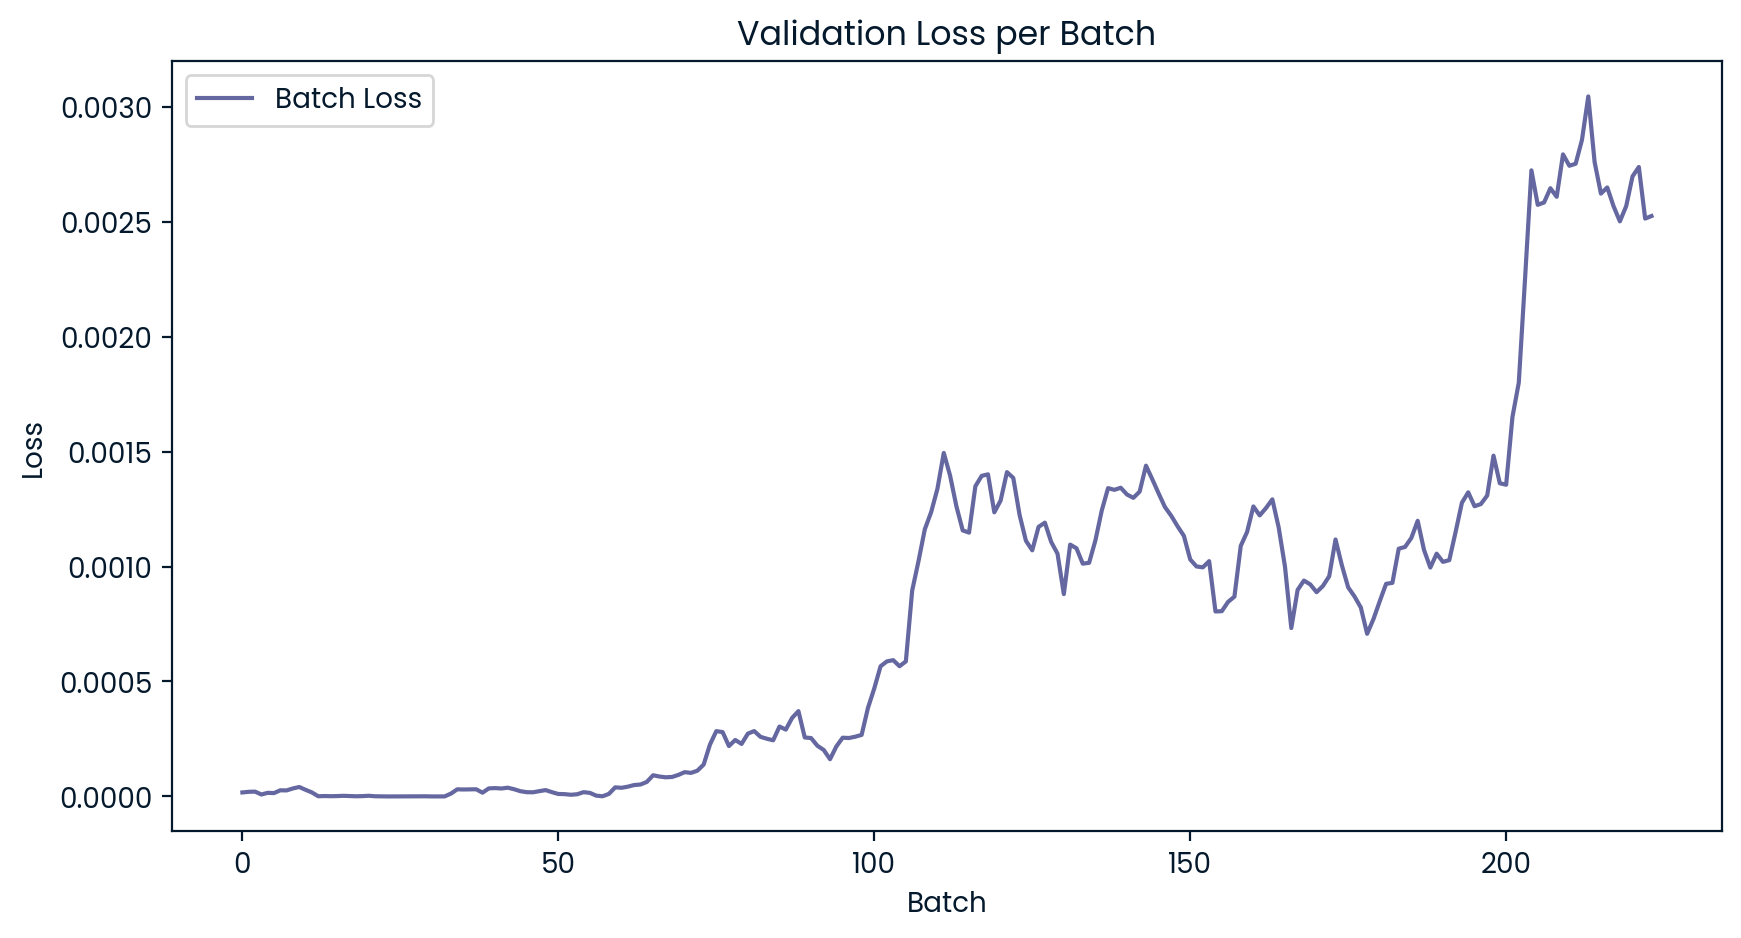

0.0007974662016491266

In [26]:
import matplotlib.pyplot as plt

# Validation loop
model1.eval()  # Set the model to evaluation mode
test_loss = 0.0
num_batches = 0
batch_losses = []

with torch.no_grad():  # Disable gradient calculation
    for x_batch, y_batch in test_loader:
        
        # Forward pass
        outputs = model1(x_batch)
        loss = criterion(outputs, y_batch)
        
        # Print each loss
        print(f'Batch Loss: {loss.item():.8f}')
        
        # Accumulate the loss
        test_loss += loss.item()
        num_batches += 1
        batch_losses.append(loss.item())

# Calculate average test loss
average_test_loss = test_loss / num_batches

# Plot the loss graph
plt.figure(figsize=(10, 5))
plt.plot(batch_losses, label='Batch Loss')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Validation Loss per Batch')
plt.legend()
plt.show()

average_test_loss

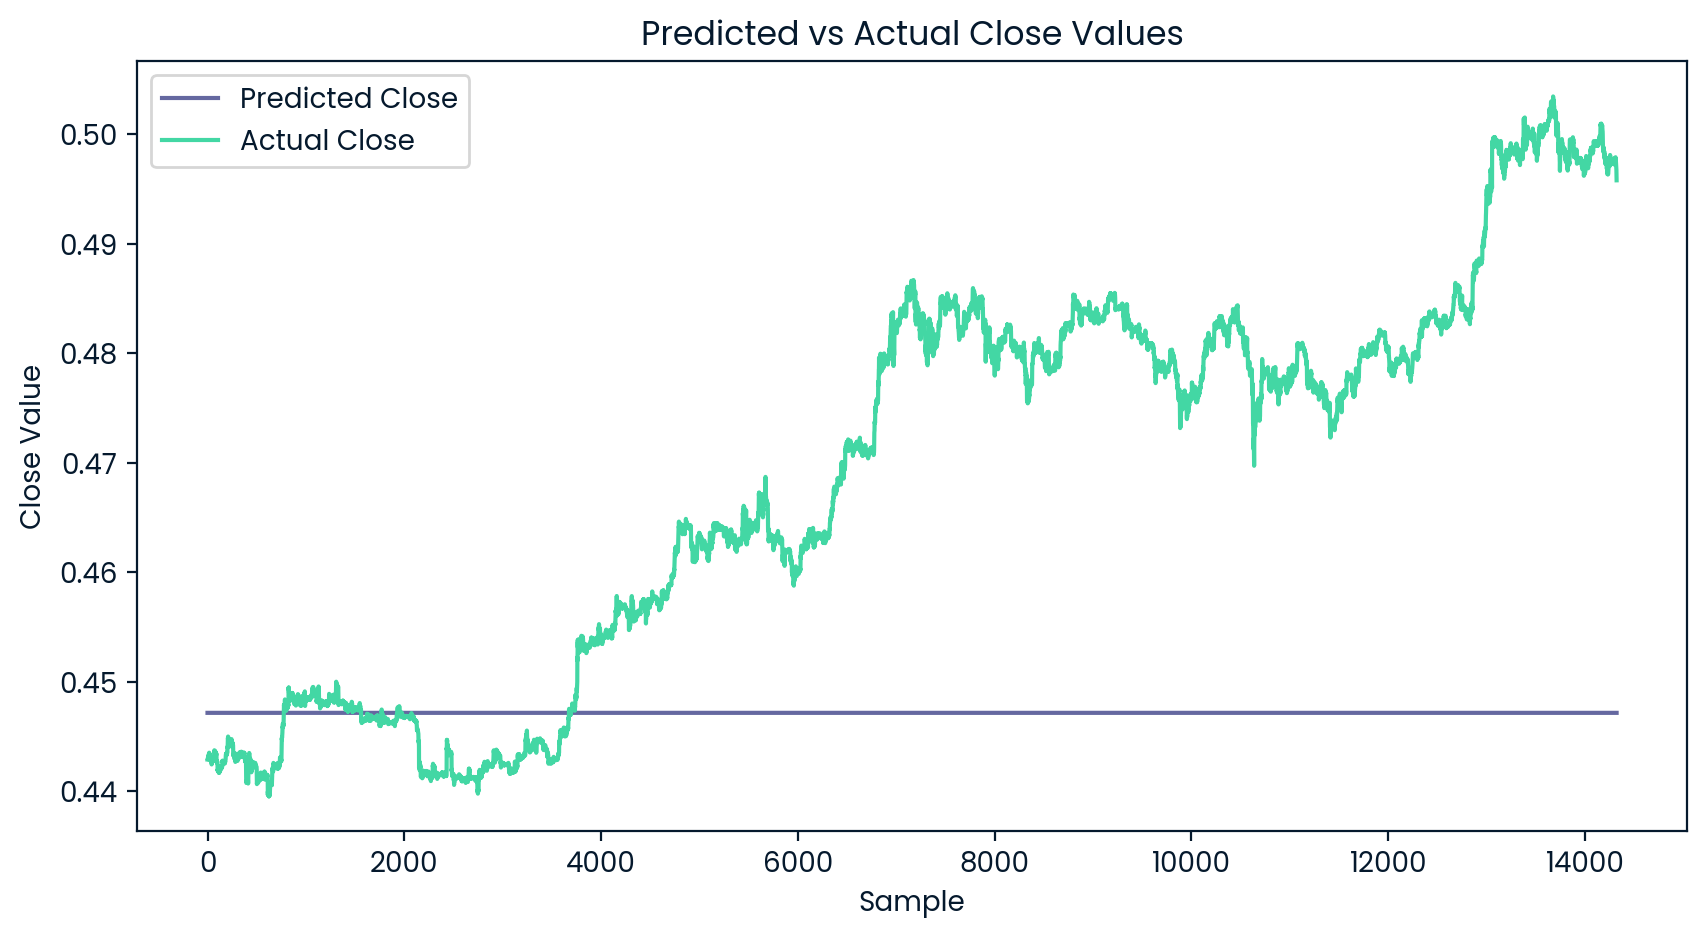

In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model_load_path = 'model_lstm_sentiment4.pth'
model1.load_state_dict(torch.load(model_load_path))
model1.eval()  # Set the model to evaluation mode

# Initialize lists to store predictions and actual values
predictions = []
actuals = []

with torch.no_grad():  # Disable gradient calculation
    for x_batch, y_batch in test_loader:
        
        # Forward pass
        outputs = model1(x_batch)
        
        # Store predictions and actual values
        predictions.extend(outputs.numpy())
        actuals.extend(y_batch.numpy())

# Convert lists to numpy arrays for easier plotting
predictions = np.array(predictions)
actuals = np.array(actuals)

# Plot the predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(predictions, label='Predicted Close')
plt.plot(actuals, label='Actual Close')
plt.xlabel('Sample')
plt.ylabel('Close Value')
plt.title('Predicted vs Actual Close Values')
plt.legend()
plt.show()

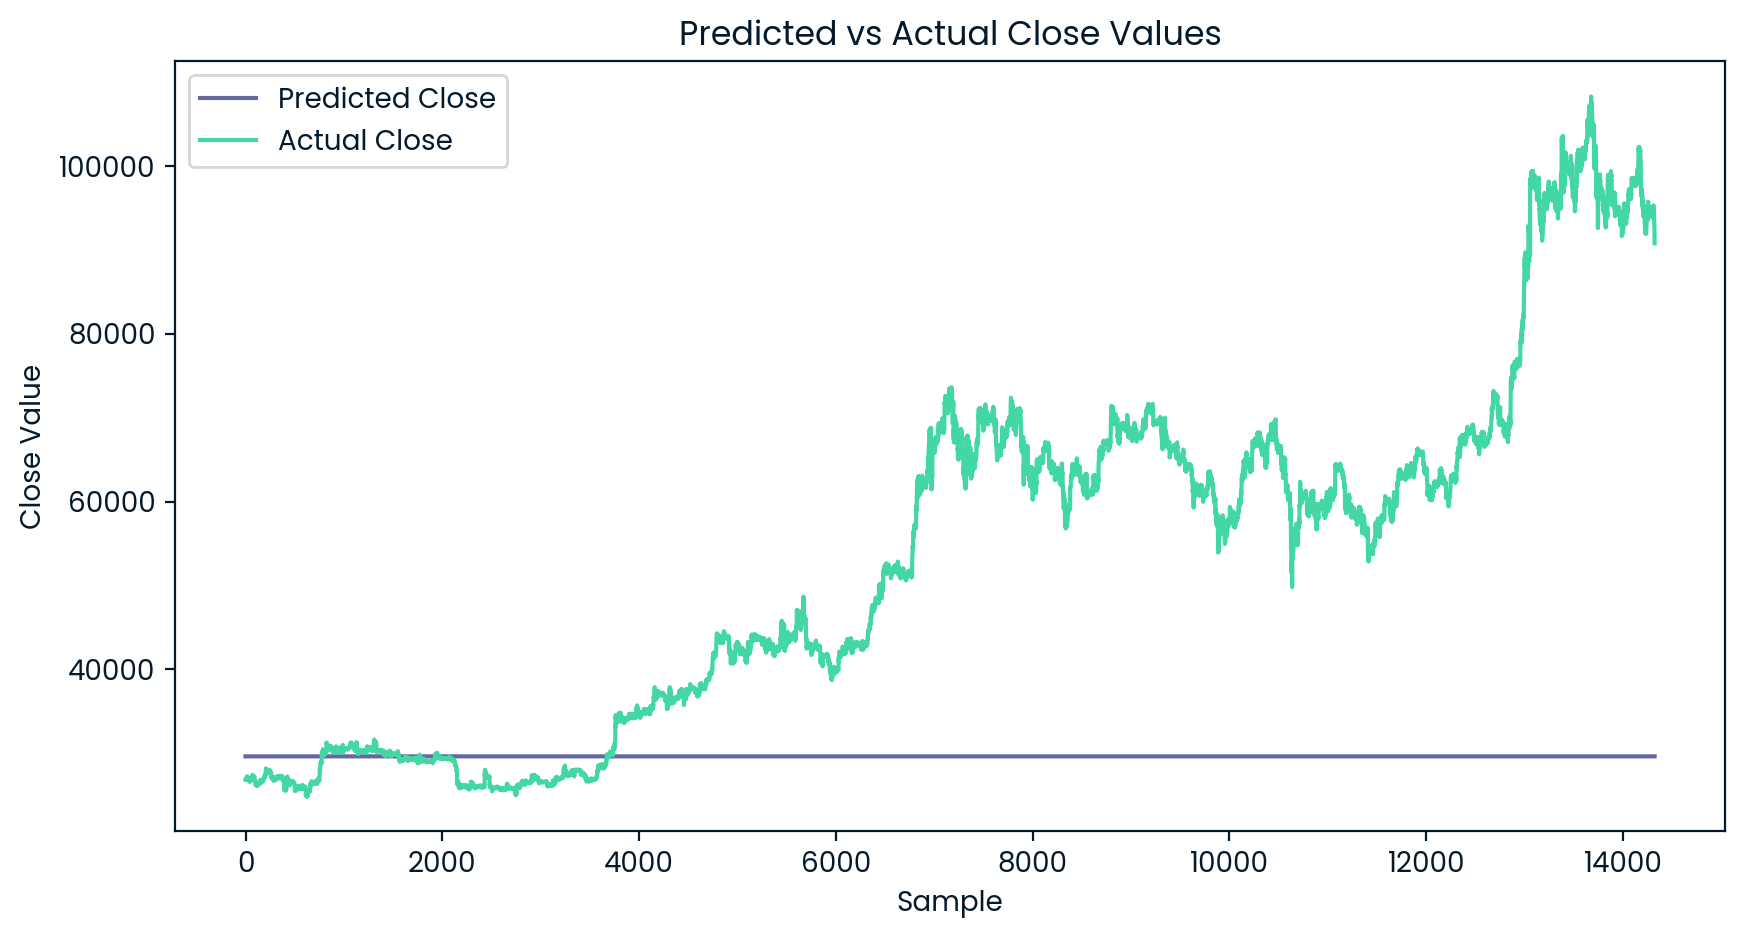

In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model_load_path = 'model_lstm_sentiment4.pth'
model1.load_state_dict(torch.load(model_load_path))
model1.eval()  # Set the model to evaluation mode

# Initialize lists to store predictions and actual values
predictions = []
actuals = []

with torch.no_grad():  # Disable gradient calculation
    for x_batch, y_batch in test_loader:
        
        # Forward pass
        outputs = model1(x_batch)
        
        # Store predictions and actual values
        predictions.extend(outputs.numpy())
        actuals.extend(y_batch.numpy())

# Convert lists to numpy arrays for easier plotting
predictions = np.array(predictions)
actuals = np.array(actuals)

# Retransform the y values
predictions = 10 ** (predictions * 10)
actuals = 10 ** (actuals * 10)

# Plot the predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(predictions, label='Predicted Close')
plt.plot(actuals, label='Actual Close')
plt.xlabel('Sample')
plt.ylabel('Close Value')
plt.title('Predicted vs Actual Close Values')
plt.legend()
plt.show()